<CENTER><img src="../../images/ATLASOD.gif" style="width:50%"></CENTER>

In [88]:

import uproot # for reading .root files
import time # to measure time to analyse
import math # for mathematical functions such as square root
#import awkward as ak # for handling complex and nested data structures efficiently
import numpy as np # # for numerical calculations such as histogramming
import matplotlib.pyplot as plt # for plotting
from matplotlib.ticker import MaxNLocator,AutoMinorLocator # for minor ticks
from lmfit.models import PolynomialModel, GaussianModel # for the signal and background fits
import vector #to use vectors
import requests # for HTTP access
import aiohttp # HTTP client support

In [89]:
# ATLAS Open Data directory
path = "https://atlas-opendata.web.cern.ch/atlas-opendata/13TeV/GamGam/Data/" # web address
tuple_path = "/project/etp1/gduckeck/atlas/13TeV/GamGam/Data/" #Current path!
#tuple_path = \"~/Downloads/GamGamNew/\" # local

In [90]:
samples_list = ['data15_periodD','data15_periodE','data15_periodF','data15_periodG','data15_periodH','data15_periodJ','data16_periodA','data16_periodB','data16_periodC','data16_periodD','data16_periodE','data16_periodF','data16_periodG','data16_periodK','data16_periodL']

In [91]:
print(samples_list[1])

# This is now appended to our file path to retrieve the data15_periodG.root file
data_15G_path = path + samples_list[3] + ".root"

data15_periodE


In [92]:
data_15G_path

'https://atlas-opendata.web.cern.ch/atlas-opendata/13TeV/GamGam/Data/data15_periodG.root'

In [93]:
# Accessing the file from the online database (":analysis" opens the tree in a desired manner)
for sample in samples_list:
    # Construct the file path
    file_path = f"{path}{sample}.root" #e.g. tree = .../GamGam/Data/data15_periodD.root + :analysis
    
    try:
        # Open the tree named ":analysis" in each file
        with uproot.open(file_path + ":analysis") as t:
            tree = t
            
            # Print the number of entries in the tree
            print(f"Processing {sample}:")
            print(f"Number of entries in the tree: {tree.num_entries}")
            
            # Print the information stored in the tree
         
            
            # Perform any additional operations on the tree here
            # For example, applying cuts, extracting data, etc.
            # ...
            
    except Exception as e:
        print(f"Failed to process {sample}. Error: {e}")


# The number of entries in the tree can be viewed
print("The number of entries in the tree are:", tree.num_entries)

# All the information stored in the tree can be viewed using the .keys() method.
print("The information stored in the tree is:", tree.keys())

Processing data15_periodD:
Number of entries in the tree: 2396
Processing data15_periodE:
Number of entries in the tree: 21942
Processing data15_periodF:
Number of entries in the tree: 15585
Processing data15_periodG:
Number of entries in the tree: 36070
Processing data15_periodH:
Number of entries in the tree: 13613
Processing data15_periodJ:
Number of entries in the tree: 73987
Processing data16_periodA:
Number of entries in the tree: 22978
Processing data16_periodB:
Number of entries in the tree: 60391
Processing data16_periodC:
Number of entries in the tree: 96566
Processing data16_periodD:
Number of entries in the tree: 151983
Processing data16_periodE:
Number of entries in the tree: 48254
Processing data16_periodF:
Number of entries in the tree: 113617
Processing data16_periodG:
Number of entries in the tree: 136784
Processing data16_periodK:
Number of entries in the tree: 76021
Processing data16_periodL:
Number of entries in the tree: 207065
The number of entries in the tree are

Perhaps we'd like to see the energies of the photons. 
We can access this from our tree using the key `photon_e`.

In [149]:

data.photon_n

0        2
1        4
2        5
3        3
4        5
        ..
18763    4
18764    4
18765    3
18766    4
18767    4
Name: photon_n, Length: 96820, dtype: int32

In [176]:
data.photon_ptcone20

0                        [0.0, 38.22719955444336]
1                            [0.0, 0.0, 0.0, 0.0]
2                                 [0.0, 0.0, 0.0]
3        [0.0, 0.0, 1.0714765787124634, 0.0, 0.0]
4                  [0.0, 10.952816009521484, 0.0]
                           ...                   
17612                                  [0.0, 0.0]
17613         [0.0, 1.1279664039611816, 0.0, 0.0]
17614         [1.1506789922714233, 0.0, 0.0, 0.0]
17615                             [0.0, 0.0, 0.0]
17616         [0.0, 0.0, 0.0, 1.4038175344467163]
Name: photon_ptcone20, Length: 91139, dtype: awkward

In [95]:
variables = ["photon_pt","photon_eta","photon_phi","photon_e",
                            "photon_isTightID","photon_ptcone20"]

In [165]:
def calc_myy(photon_pt,photon_eta,photon_phi,photon_E):
    # first photon is [0], 2nd photon is [1] etc
    px_0 = photon_pt[0]*math.cos(photon_phi[0]) # x-component of photon[0] momentum
    py_0 = photon_pt[0]*math.sin(photon_phi[0]) # y-component of photon[0] momentum
    pz_0 = photon_pt[0]*math.sinh(photon_eta[0]) # z-component of photon[0] momentum
    px_1 = photon_pt[1]*math.cos(photon_phi[1]) # x-component of photon[1] momentum
    py_1 = photon_pt[1]*math.sin(photon_phi[1]) # y-component of photon[1] momentum
    pz_1 = photon_pt[1]*math.sinh(photon_eta[1]) # z-component of photon[1] momentum
    sumpx = px_0 + px_1 # x-component of diphoton momentum
    sumpy = py_0 + py_1 # y-component of diphoton momentum
    sumpz = pz_0 + pz_1 # z-component of diphoton momentum 
    sump = math.sqrt(sumpx**2 + sumpy**2 + sumpz**2) # magnitude of diphoton momentum 
    sumE = photon_E[0] + photon_E[1] # energy of diphoton system
    m2 = sumE**2 - sump**2
    if m2>0.:
        m = m2**0.5
    else:
        print('calc_myy error neg mass**2', m2)
        m = 0.
    return m 

Based on our analysis, this entry should be removed because the photons do not match all our requirements.
We can turn these checks and calculations into a set of functions.

In [177]:
def cut_photon_reconstruction(photon_isTightID):
    return photon_isTightID[0]==True and photon_isTightID[1]==True

def cut_photon_pt(photon_pt):
    return photon_pt[0]>40 and photon_pt[1]>30

def cut_photon_eta_transition(photon_eta):
    return (abs(photon_eta[0])>1.52 or abs(photon_eta[0])<1.37) and (abs(photon_eta[1])>1.52 or abs(photon_eta[1])<1.37)

def cut_n_photon(photon_n):
    return photon_n>=2

def cut_isolation_pt(photon_ptcone20):
    # Keep only the events where first two photons have isolation pt < 4 GeV
    return (photon_ptcone20[0] < 4) and (photon_ptcone20[1] < 4)



You may verify on your own that these functions give the same outputs as the previous code block.
Now, 
    we shall apply these functions over the entire data tree using a `for` loop.

In [178]:
def get_data_from_files():

    frames = [] # define empty list to hold data
    for val in samples_list: # loop over each file
        fileString = tuple_path+val+".root" # file name to open
        temp = read_file_new(fileString) # call the function read_file defined below
        frames.append(temp) # append dataframe returned from read_file to list of dataframes
    data = pd.concat(frames) # concatenate list of dataframes together into one dataframe
    
    return data # return dataframe

In [179]:
#pname = '/project/etp1/dkoch/ATLASOpenData/ntuples-data-samples/data15_allyear.root'
#tree = uproot.open(pname+':analysis')
def read_file_new(path):
    start = time.time() # start the clock
    print("Processing: "+path) # print which sample is being processed
    data_all = pd.DataFrame() # define empty pandas DataFrame to hold all data for this sample
    tree = uproot.open(path + ":analysis")
    numevents = tree.num_entries # number of events
    for data in tree.iterate(["photon_n","photon_pt","photon_eta","photon_phi","photon_e",
                            "photon_isTightID","photon_ptcone20"], # add more variables here if you want to use them
                           library="pd", # choose output type as pandas DataFrame
                           entry_stop=numevents*fraction): # process up to numevents*fraction

        nIn = len(data.index) # number of events in this batch
        
        # Cut on photon reconstruction quality using the function cut_photon_reconstruction defined above
        print("before cut ",len(data.index))
        data = data[ np.vectorize(cut_photon_reconstruction)(data.photon_isTightID)]
        print("istight-cut ",len(data.index))
        
        # Cut on transverse momentum of the photons using the function cut_photon_pt defined above
        data = data[ np.vectorize(cut_photon_pt)(data.photon_pt)]
        print("pt-cut ",len(data.index))
        
        # Cut on ptcone20
        data = data[np.vectorize(cut_isolation_pt)(data.photon_ptcone20)]
        print("iso-cut ",len(data.index))
        
        # Cut on pseudorapidity inside barrel/end-cap transition region using the function cut_photon_eta_transition
        data = data[ np.vectorize(cut_photon_eta_transition)(data.photon_eta)]
        print("eta-cut ",len(data.index))
       
        
        # Calculate reconstructed diphoton invariant mass using the function calc_myy defined above
        data['myy'] = np.vectorize(calc_myy)(data.photon_pt,data.photon_eta,data.photon_phi,data.photon_e)
        
        # dataframe contents can be printed at any stage like this
        #print(data)

        # dataframe column can be printed at any stage like this
        #print(data['photon_pt'])

        # multiple dataframe columns can be printed at any stage like this
        #print(data[['photon_pt','photon_eta']])

        nOut = len(data.index) # number of events passing cuts in this batch
        data_all = pd.concat([data_all, data], ignore_index=True)
        elapsed = time.time() - start # time taken to process
        print("\t nIn: "+str(nIn)+",\t nOut: \t"+str(nOut)+"\t in "+str(round(elapsed,1))+"s") # events before and after
    
    return data_all # return dataframe containing events passing all cuts

In [180]:
start = time.time() # time at start of whole processing
data = get_data_from_files() # process all files
elapsed = time.time() - start # time after whole processing
print("Time taken: "+str(round(elapsed,1))+"s") # print total time taken to process every file

Processing: /project/etp1/gduckeck/atlas/13TeV/GamGam/Data/data15_periodD.root
before cut  2396
istight-cut  478
pt-cut  191
iso-cut  105
eta-cut  104
	 nIn: 2396,	 nOut: 	104	 in 0.5s
Processing: /project/etp1/gduckeck/atlas/13TeV/GamGam/Data/data15_periodE.root
before cut  21942
istight-cut  4436
pt-cut  1761
iso-cut  1161
eta-cut  1151
	 nIn: 21942,	 nOut: 	1151	 in 0.3s
Processing: /project/etp1/gduckeck/atlas/13TeV/GamGam/Data/data15_periodF.root
before cut  15585
istight-cut  3173
pt-cut  1339
iso-cut  859
eta-cut  855
	 nIn: 15585,	 nOut: 	855	 in 0.3s
Processing: /project/etp1/gduckeck/atlas/13TeV/GamGam/Data/data15_periodG.root
before cut  36070
istight-cut  7327
pt-cut  2942
iso-cut  1913
eta-cut  1901
	 nIn: 36070,	 nOut: 	1901	 in 0.8s
Processing: /project/etp1/gduckeck/atlas/13TeV/GamGam/Data/data15_periodH.root
before cut  13613
istight-cut  2812
pt-cut  1150
iso-cut  761
eta-cut  754
	 nIn: 13613,	 nOut: 	754	 in 0.2s
Processing: /project/etp1/gduckeck/atlas/13TeV/GamGam

We are now ready to fit our data to effectively detect the Higgs boson! We will use a combination of a 4th order polynomial and a Gaussian function. The polynomial function represents the background, while the Gaussian function represents our signal. The Gaussian model is used to fit the signal due to the nature of the detector's resolution. The fourth-order polynomial is chosen for the background because it offers enough flexibility to capture the overall shape without overfitting, thereby reducing the influence of spurious data—random, irrelevant fluctuations or noise that do not correspond to the true signal or background.

In [181]:
len(data)

63777

In [186]:
data['myy']

0        141.295156
1        113.982391
2         92.164946
3        361.862695
4         89.845035
            ...    
12392    126.100221
12393     91.483729
12394     94.305629
12395    222.713095
12396     91.849846
Name: myy, Length: 63777, dtype: float64

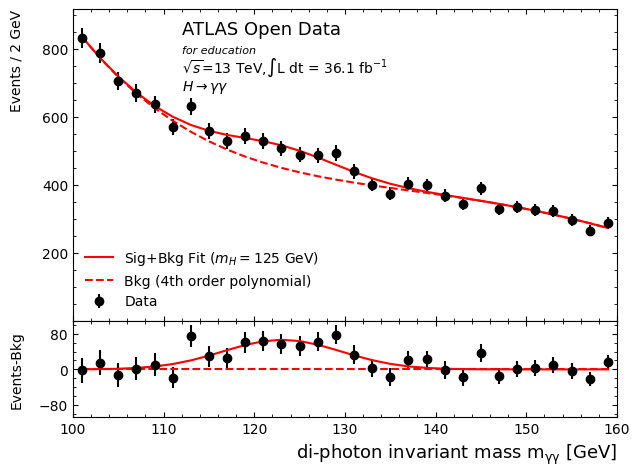

In [187]:

data_x,_ = np.histogram(ak.to_numpy(data['myy']), 
                            bins=bin_edges ) # histogram the data
data_x_errors = np.sqrt( data_x ) # statistical error on the data

# data fit
polynomial_mod = PolynomialModel( 4 ) # 4th order polynomial
gaussian_mod = GaussianModel() # Gaussian

# set initial guesses for the parameters of the polynomial model
# c0 + c1*x + c2*x^2 + c3*x^3 + c4*x^4
pars = polynomial_mod.guess(data_x, # data to use to guess parameter values
                            x=bin_centres, c0=data_x.max(), c1=0,
                            c2=0, c3=0, c4=0 )

# set initial guesses for the parameters of the Gaussian model
pars += gaussian_mod.guess(data_x, # data to use to guess parameter values
                        x=bin_centres, amplitude=100, 
                        center=125, sigma=2 )

model = polynomial_mod + gaussian_mod # combined model

# fit the model to the data
out = model.fit(data_x, # data to be fit
                pars, # guesses for the parameters
                x=bin_centres, weights=1/data_x_errors ) #ASK

# background part of fit
params_dict = out.params.valuesdict() # get the parameters from the fit to data
c0 = params_dict['c0'] # c0 of c0 + c1*x + c2*x^2 + c3*x^3 + c4*x^4
c1 = params_dict['c1'] # c1 of c0 + c1*x + c2*x^2 + c3*x^3 + c4*x^4
c2 = params_dict['c2'] # c2 of c0 + c1*x + c2*x^2 + c3*x^3 + c4*x^4
c3 = params_dict['c3'] # c3 of c0 + c1*x + c2*x^2 + c3*x^3 + c4*x^4
c4 = params_dict['c4'] # c4 of c0 + c1*x + c2*x^2 + c3*x^3 + c4*x^4

# get the background only part of the fit to data
background = c0 + c1*bin_centres + c2*bin_centres**2 + c3*bin_centres**3 + c4*bin_centres**4

# data fit - background fit = signal fit
signal_x = data_x - background 

# *************
# Main plot 
# *************
plt.axes([0.1,0.3,0.85,0.65]) # left, bottom, width, height 
main_axes = plt.gca() # get current axes

# plot the data points
main_axes.errorbar(x=bin_centres, y=data_x, yerr=data_x_errors, 
                fmt='ko', # 'k' means black and 'o' means circles
                label='Data' ) 

# plot the signal + background fit
main_axes.plot(bin_centres, # x
            out.best_fit, # y
            '-r', # single red line
            label='Sig+Bkg Fit ($m_H=125$ GeV)' )

# plot the background only fit
main_axes.plot(bin_centres, # x
            background, # y
            '--r', # dashed red line
            label='Bkg (4th order polynomial)' )

# set the x-limit of the main axes
main_axes.set_xlim( left=xmin, right=xmax ) 

# separation of x-axis minor ticks
main_axes.xaxis.set_minor_locator( AutoMinorLocator() ) 

# set the axis tick parameters for the main axes
main_axes.tick_params(which='both', # ticks on both x and y axes
                    direction='in', # Put ticks inside and outside the axes
                    top=True, # draw ticks on the top axis
                    labelbottom=False, # don't draw tick labels on bottom axis
                    right=True ) # draw ticks on right axis

# write y-axis label for main 
main_axes.set_ylabel('Events / '+str(step_size)+' GeV', 
                    horizontalalignment='right') 

# set the y-axis limit for the main axes
main_axes.set_ylim( bottom=0, top=np.amax(data_x)*1.1 ) 

# set minor ticks on the y-axis of the main axes
main_axes.yaxis.set_minor_locator( AutoMinorLocator() ) 

# avoid displaying y=0 on the main axes
main_axes.yaxis.get_major_ticks()[0].set_visible(False) 

# Add text 'ATLAS Open Data' on plot
plt.text(0.2, # x
        0.92, # y
        'ATLAS Open Data', # text
        transform=main_axes.transAxes, # coordinate system used is that of main_axes
        fontsize=13 ) 

# Add text 'for education' on plot
plt.text(0.2, # x
        0.86, # y
        'for education', # text
        transform=main_axes.transAxes, # coordinate system used is that of main_axes
        style='italic',
        fontsize=8 ) 

lumi = 36.1
lumi_used = str(lumi*fraction) # luminosity to write on the plot
plt.text(0.2, # x
        0.8, # y
        '$\sqrt{s}$=13 TeV,$\int$L dt = '+lumi_used+' fb$^{-1}$', # text
        transform=main_axes.transAxes ) # coordinate system used is that of main_axes 

# Add a label for the analysis carried out
plt.text(0.2, # x
        0.74, # y
        r'$H \rightarrow \gamma\gamma$', # text 
        transform=main_axes.transAxes ) # coordinate system used is that of main_axes

# draw the legend
main_axes.legend(frameon=False, # no box around the legend
                loc='lower left' ) # legend location 


# *************
# Data-Bkg plot 
# *************
plt.axes([0.1,0.1,0.85,0.2]) # left, bottom, width, height
sub_axes = plt.gca() # get the current axes

# set the y axis to be symmetric about Data-Background=0
sub_axes.yaxis.set_major_locator( MaxNLocator(nbins='auto', 
                                            symmetric=True) )

# plot Data-Background
sub_axes.errorbar(x=bin_centres, y=signal_x, yerr=data_x_errors,
                fmt='ko' ) # 'k' means black and 'o' means circles

# draw the fit to data
sub_axes.plot(bin_centres, # x
            out.best_fit-background, # y
            '-r' ) # single red line

# draw the background only fit
sub_axes.plot(bin_centres, # x
            background-background, # y
            '--r' )  # dashed red line

# set the x-axis limits on the sub axes
sub_axes.set_xlim( left=xmin, right=xmax ) 

# separation of x-axis minor ticks
sub_axes.xaxis.set_minor_locator( AutoMinorLocator() ) 

# x-axis label
sub_axes.set_xlabel(r'di-photon invariant mass $\mathrm{m_{\gamma\gamma}}$ [GeV]',
                    x=1, horizontalalignment='right', 
                    fontsize=13 ) 

# set the tick parameters for the sub axes
sub_axes.tick_params(which='both', # ticks on both x and y axes
                    direction='in', # Put ticks inside and outside the axes
                    top=True, # draw ticks on the top axis
                    right=True ) # draw ticks on right axis 

# separation of y-axis minor ticks
sub_axes.yaxis.set_minor_locator( AutoMinorLocator() ) 

# y-axis label on the sub axes
sub_axes.set_ylabel( 'Events-Bkg' ) 


# Generic features for both plots
main_axes.yaxis.set_label_coords( -0.09, 1 ) # x,y coordinates of the y-axis label on the main axes
sub_axes.yaxis.set_label_coords( -0.09, 0.5 ) # x,y coordinates of the y-axis label on the sub axes make it pandas eligible

In [ ]:
params_dict

And there it is—a clear peak in the invariant mass spectrum around 125 GeV, signaling the presence of the Higgs boson! While our main task may be done, there's still more to explore. Here are some additional tasks you can try with this notebook:

* Check how many events are being thrown away by each cut in '[Applying a cut](#applying_cut)'
* Add more cuts from the [Higgs discovery paper](https://www.sciencedirect.com/science/article/pii/S037026931200857X#se0090) in '[Changing a cut](#changing_cut)' and '[Applying a cut](#applying_cut)'
* Find the reduced chi-squared for the fit in '[Plotting](#plotting)'
* Find the mean of the fitted Gaussian in '[Plotting](#plotting)'
* Find the width of the fitted Gaussian in '[Plotting](#plotting)'
* Try different initial guesses for the parameters of the fit in '[Plotting](#plotting)'
* Try different functions for the fit in '[Plotting](#plotting)'
* Your idea!